# Reading licel files

In [1]:
# Import plotting library
from matplotlib import pyplot as plt

import glob

import numpy as np

# Import the module for licel files
from lifa import licel
import lifa

print(lifa.__version__)


0.5.5


In [2]:
# Read the file
licel_file = licel.LicelFile('./sample_data/measurement_1/a24C0506.105499')
#licel_file = licel.LicelFile(r'd:\Local - OURO NOVA\Medidas\Medidas CEPEMA\20250902 Leo\arquivos ok\b2590217.113121')
licel_file = licel.LicelFile(r'd:\Local - FAMES\Medidas\Medidas CEPEMA\20250902 Leo\20250903 CEPEMA FLARE\a2590319.194507')
# The licel file object has several properties describing the file
print("Start time: {}, Stop times: {}".format(licel_file.start_time, licel_file.stop_time))


Start time: 2025-09-03 19:19:04+00:00, Stop times: 2025-09-03 19:19:45+00:00


In [3]:
# See available channel
# Note that the channels have a semi-descriptive name.
# This does not work always and you might need to set "use_id_as_name=True" when reading the file.
print("Available channels: ", licel_file.channels.keys())

Available channels:  odict_keys(['00355.o_an', '00355.o_std_an', '00355.o_ph', '00355.o_std_ph', '00395.s_an', '00395.s_std_an', '00395.s_ph', '00395.s_std_ph', '00353.o_an', '00353.o_std_an', '00353.o_ph', '00353.o_std_ph', '00371.o_an', '00371.o_std_an', '00371.o_ph', '00371.o_std_ph', '00395.p_an', '00395.p_std_an', '00395.p_ph', '00395.p_std_ph', '00460.o_an', '00460.o_std_an', '00460.o_ph', '00460.o_std_ph', '00532.o_an', '00532.o_std_an', '00532.o_ph', '00532.o_std_ph', '00530.o_an', '00530.o_std_an', '00530.o_ph', '00530.o_std_ph'])


## Analog channel

In [4]:
# Get one channel of interest
channel = licel_file.channels['00355.o_an']

# The channel object has several properties describing the channel data. E.g.
print("Channel name: ", channel.channel_name)
print('Channel id: ', channel.id)
print("Wavelength: ", channel.wavelength)
print("Number of shots: ", channel.number_of_shots)
print("Is analog?: ", channel.is_analog)
print("ADC bits: ", channel.adcbits)

Channel name:  00355.o_an
Channel id:  BT0
Wavelength:  355
Number of shots:  4094
Is analog?:  True
ADC bits:  16


In [5]:
# Data are stored in the .data property, already converted in physical quantities
channel.data

array([5.1462654 , 5.1430414 , 5.14815135, ..., 5.13813272, 5.13844022,
       5.13824454], shape=(16380,))

Text(0.5, 0, 'Range (m)')

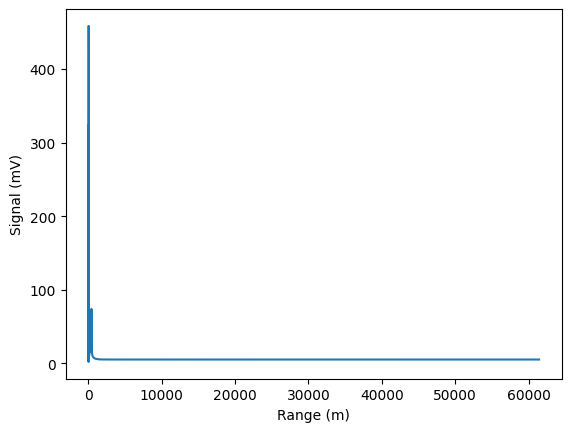

In [6]:
plt.plot(channel.z, channel.data)
plt.ylabel('Signal (mV)')
plt.xlabel('Range (m)')

## Photon Counting Channel

In [7]:
# Get one channel of interest
channel = licel_file.channels['00355.o_ph']

# The channel object has several properties describing the channel data. E.g.
print("Channel name: ", channel.channel_name)
print('Channel id: ', channel.id)
print("Wavelength: ", channel.wavelength)
print("Number of shots: ", channel.number_of_shots)
print("Is analog?: ", channel.is_analog)
print("ADC bits: ", channel.adcbits)

Channel name:  00355.o_ph
Channel id:  BC0
Wavelength:  355
Number of shots:  4094
Is analog?:  False
ADC bits:  0


In [8]:
# Data are stored in the .data property, already converted in physical quantities
channel.data

array([0.12701514, 0.05862237, 0.08793356, ..., 0.0097704 , 0.        ,
       0.        ], shape=(16380,))

Text(0.5, 0, 'Range (m)')

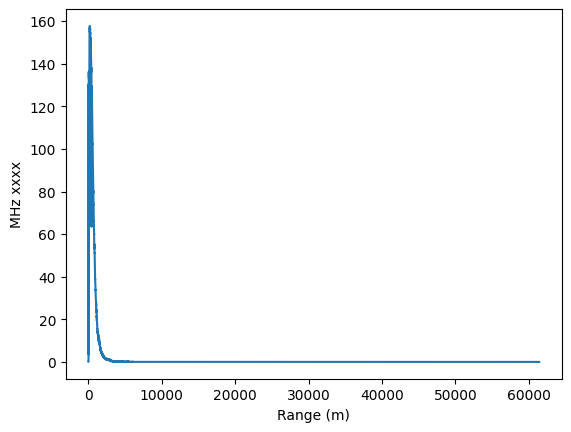

In [9]:
plt.plot(channel.z, channel.data)
plt.ylabel(channel.unit)
plt.xlabel('Range (m)')

# Reading many files - Measurement

In [11]:
# Find files in directory
files = glob.glob('./sample_data/measurement_1/*')
print(files)


['./sample_data/measurement_1\\a24C0506.105499', './sample_data/measurement_1\\a24C0506.113644', './sample_data/measurement_1\\a24C0506.121789']


In [12]:
# Read all files
measurements = licel.LicelLidarMeasurement(files)

In [13]:
# Print available channels
print("Available channels: ", measurements.channels.keys())

Available channels:  odict_keys(['00355.o_an', '00355.o_std_an', '00355.o_ph', '00355.o_std_ph', '00395.s_an', '00395.s_std_an', '00395.s_ph', '00395.s_std_ph', '00353.o_an', '00353.o_std_an', '00353.o_ph', '00353.o_std_ph', '00371.o_an', '00371.o_std_an', '00371.o_ph', '00371.o_std_ph', '00395.p_an', '00395.p_std_an', '00395.p_ph', '00395.p_std_ph', '00460.o_an', '00460.o_std_an', '00460.o_ph', '00460.o_std_ph', '00532.o_an', '00532.o_std_an', '00532.o_ph', '00532.o_std_ph', '00530.o_an', '00530.o_std_an', '00530.o_ph', '00530.o_std_ph'])


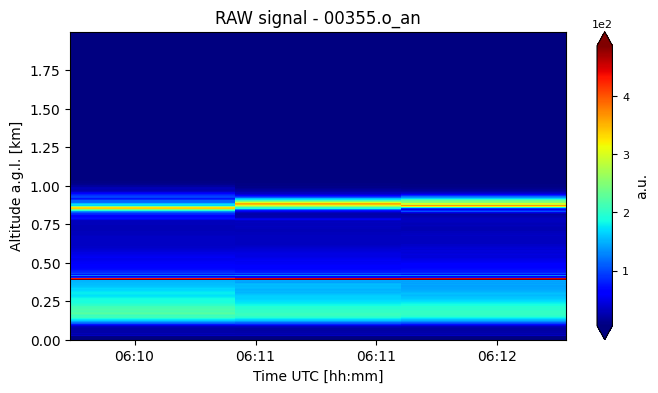

In [14]:
# Plot a single channel
measurements.channels['00355.o_an'].plot(signal_type='raw', zoom=[0, 2000, 0, None])

In [15]:
# Subset by channels
subset_channels = measurements.subset_by_channels(['00355.o_an', '00395.s_an', '00353.o_an'])
print("Available channels: ", subset_channels.channels.keys())

Available channels:  dict_keys(['00355.o_an', '00395.s_an', '00353.o_an'])


In [16]:
# Subset by bins
subset_bins = subset_channels.subset_by_bins(5, 200)

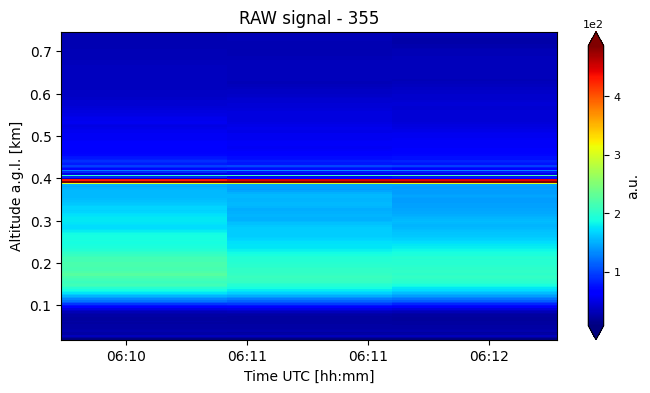

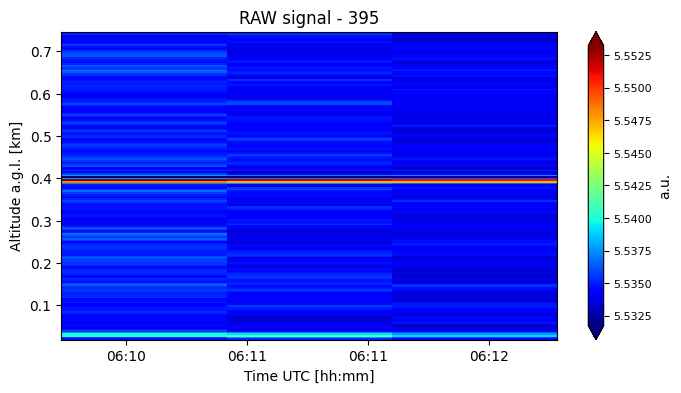

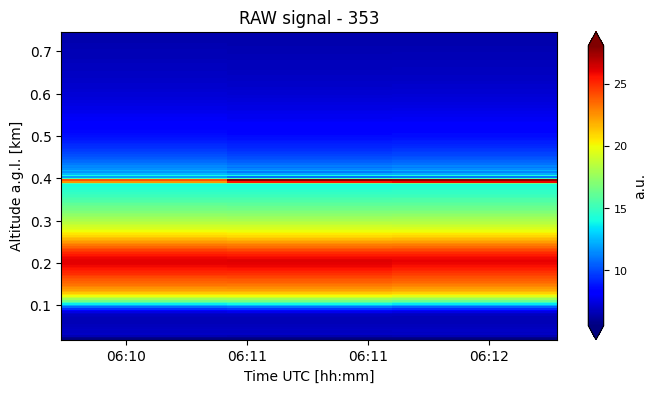

In [17]:
# Plot all channels
subset_bins.plot(signal_type='raw')

In [18]:
# Getting matrix of data
data = subset_bins.channels['00355.o_an'].matrix
print(data)
print(data.shape)

[[  7.78800873  22.30458081  33.17983555  24.31728456  23.04757665
   28.1963933   25.4059267   23.83811997  24.49912932  23.10558815
   22.57724544  22.77181847  22.16331932  22.16841249  22.98660206
   24.14755683  26.79493004  31.74347668  38.92965602  48.83756182
   61.56449738  76.50807608  93.49522321 110.00316287 121.76897013
  132.07932053 143.77306301 153.18370137 164.21466037 175.8848043
  181.58138033 187.96662501 197.78480858 207.01510237 212.89497302
  210.88996773 208.02367936 211.68105707 214.51551357 217.70914411
  224.84293811 225.4893966  219.47808741 215.58583854 215.22149864
  215.79710182 217.48664901 218.83252157 217.33830776 214.74901313
  213.58021827 213.80827989 211.42236186 206.26570884 202.36285619
  199.44660142 196.26960522 194.12558592 192.64052976 190.56127744
  187.77142954 187.91617221 189.5616941  188.18697512 187.43471914
  187.49564527 185.29505317 182.35439664 179.05937411 174.64908256
  171.65225017 171.34795307 172.56520669 174.75905263 176.24102

Text(0.5, 0, 'Range (m)')

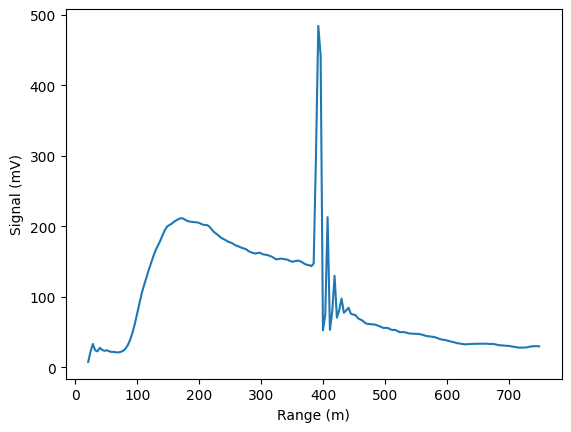

In [19]:
# Average of data
channel = subset_bins.channels['00355.o_an']
plt.plot(channel.z, channel.average_profile())
plt.ylabel('Signal (mV)')
plt.xlabel('Range (m)')

## Range corrected signal

In [20]:
channel = measurements.channels['00353.o_an']

In [21]:
# Raw signal
channel.matrix

array([[5.499861  , 5.49878757, 5.49880844, ..., 5.49978645, 5.49970185,
        5.49985056],
       [5.49968955, 5.49851474, 5.49870856, ..., 5.49950132, 5.49955947,
        5.4992147 ],
       [5.49954344, 5.49886882, 5.49924378, ..., 5.5000194 , 5.50068656,
        5.50045548]], shape=(3, 16380))

In [22]:
# Range corrected signal
# Background region
bin_min = -2000
bin_max = -500
bin_zero = 0
channel.calculate_rc(bin_min, bin_max, bin_zero)
channel.rc

array([[-2.87371568e-04, -3.65501538e-02, -9.96937401e-02, ...,
        -5.89486551e+05, -9.08723717e+05, -3.47766595e+05],
       [ 1.62544084e-04, -3.57086061e-02, -8.21562544e-02, ...,
        -5.35558440e+05, -3.16285660e+05, -1.61704605e+06],
       [-1.07284058e-03, -3.10008762e-02, -5.31586909e-02, ...,
         6.44220678e+05,  3.16106440e+06,  2.28961529e+06]],
      shape=(3, 16380))

Text(0.5, 1.0, 'range corrected')

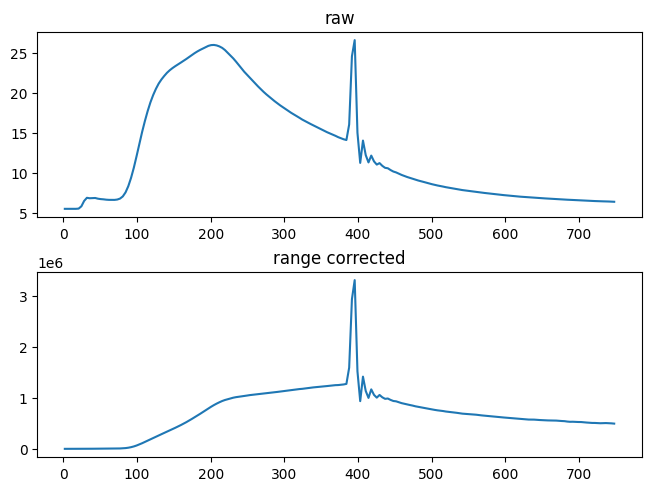

In [23]:
fig, axs = plt.subplots(2, layout="constrained")
bin_min = 0
bin_max = 200
axs[0].plot(channel.z[bin_min:bin_max], np.mean(channel.matrix, axis=0).transpose()[bin_min:bin_max])
axs[0].set_title('raw')
axs[1].plot(channel.z[bin_min:bin_max], np.mean(channel.rc, axis=0).transpose()[bin_min:bin_max])
axs[1].set_title('range corrected')



# Photon counting channel

In [24]:
# Get one channel of interest
channel_ph = measurements.channels["00355.o_ph"]

# The channel object has several properties describing the channel data. E.g.
channel_ph.raw_info

[{'active': '1',
  'analog_photon': '1',
  'laser_used': '1',
  'number_of_datapoints': '16380',
  '1': '1',
  'HV': '0754',
  'bin_width': '3.75',
  'wavelength': '00355.o',
  'd1': '0',
  'd2': '0',
  'd3': '00',
  'd4': '000',
  'ADCbits': '00',
  'number_of_shots': '004094',
  'discriminator': '3.1746',
  'ID': 'BC0'},
 {'active': '1',
  'analog_photon': '1',
  'laser_used': '1',
  'number_of_datapoints': '16380',
  '1': '1',
  'HV': '0754',
  'bin_width': '3.75',
  'wavelength': '00355.o',
  'd1': '0',
  'd2': '0',
  'd3': '00',
  'd4': '000',
  'ADCbits': '00',
  'number_of_shots': '004094',
  'discriminator': '3.1746',
  'ID': 'BC0'},
 {'active': '1',
  'analog_photon': '1',
  'laser_used': '1',
  'number_of_datapoints': '16380',
  '1': '1',
  'HV': '0754',
  'bin_width': '3.75',
  'wavelength': '00355.o',
  'd1': '0',
  'd2': '0',
  'd3': '00',
  'd4': '000',
  'ADCbits': '00',
  'number_of_shots': '004094',
  'discriminator': '3.1746',
  'ID': 'BC0'}]

In [25]:
# Data are stored in the .data property, already converted in physical quantities (photons/bin/shots)
channel_ph.binwidth

channel_ph.laser_shots

[4094, 4094, 4094]

Text(0.5, 0, 'Range (m)')

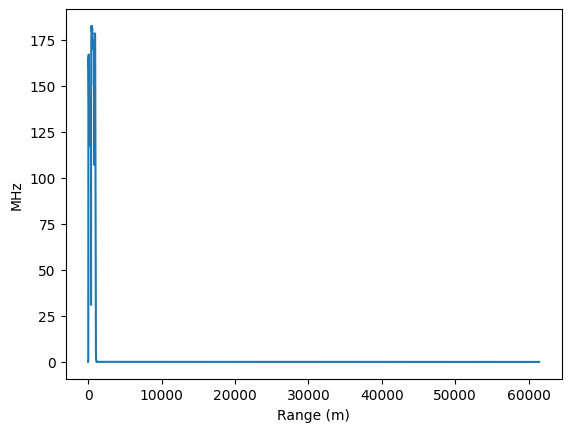

In [26]:
plt.plot(channel_ph.z, channel_ph.average_profile())
plt.ylabel(channel_ph.unit)
plt.xlabel('Range (m)')

In [27]:
def deadtime_correction(observed, deadtime):
    return (observed/(1 - observed*deadtime))

Text(0.5, 0, 'Range (m)')

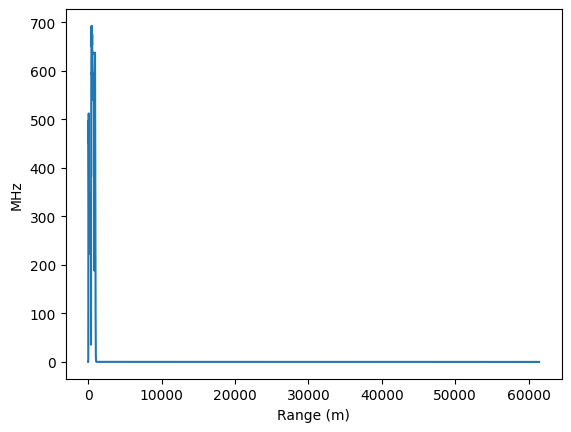

In [28]:
plt.plot(channel_ph.z, deadtime_correction(channel_ph.average_profile(), 1/248))
plt.ylabel(channel_ph.unit)
plt.xlabel('Range (m)')

In [48]:
deadtime_correction(160, 0.004)

444.44444444444446

In [57]:
S = 160e6
d = 4e-9
deadtime_correction(150, 1/250)

375.0

In [50]:
2.77*160

443.2

In [55]:
1/1e-3

1000.0

In [56]:
1/250

0.004